In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV,train_test_split



In [2]:
heart=pd.read_csv("heart.csv")
print(heart.head())
print(heart.shape)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
(303, 14)


age : 나이
sex : 성별(0 : 여성; 1 : 남성)
cp : 가슴통증 유형(0 = 증상 없음 ; 1 = 비전형적 협심증; 2 = 비협심증 통증; 3 = 전형적인 협심증)
trestbps : 평시 혈압
chol : 혈중 콜레스테롤 농도
fbs : 공복시 혈당 > 120mg/dl(0 = False; 1 = True)
restecg : 안정 심전도 결과(0 = 좌심실 비대; 1 = 정상; 2 = ST-T파 비정상)
thalach : 최대 심박수
exang : 협심증 유발 운동(0 = no; 1 = yes)
old peak : 비교적 안정되기까지 운동으로 유발되는 ST
slope : 최대 운동 ST segment의 기울기(0 = 하강; 1 = 평면; 2 = 상승)
ca : 형광 투시된 주요 혈관의 수(0~3; 4 = NA)
thal : 0 = NA; 1 = 해결된 결함; 2 = 정상; 3 = 해결가능한 결함
target : 심장병 진단(0 = False; 1 = True)

**데이터 전처리 과정**

In [3]:
heart.isnull().sum()# null값 없음

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

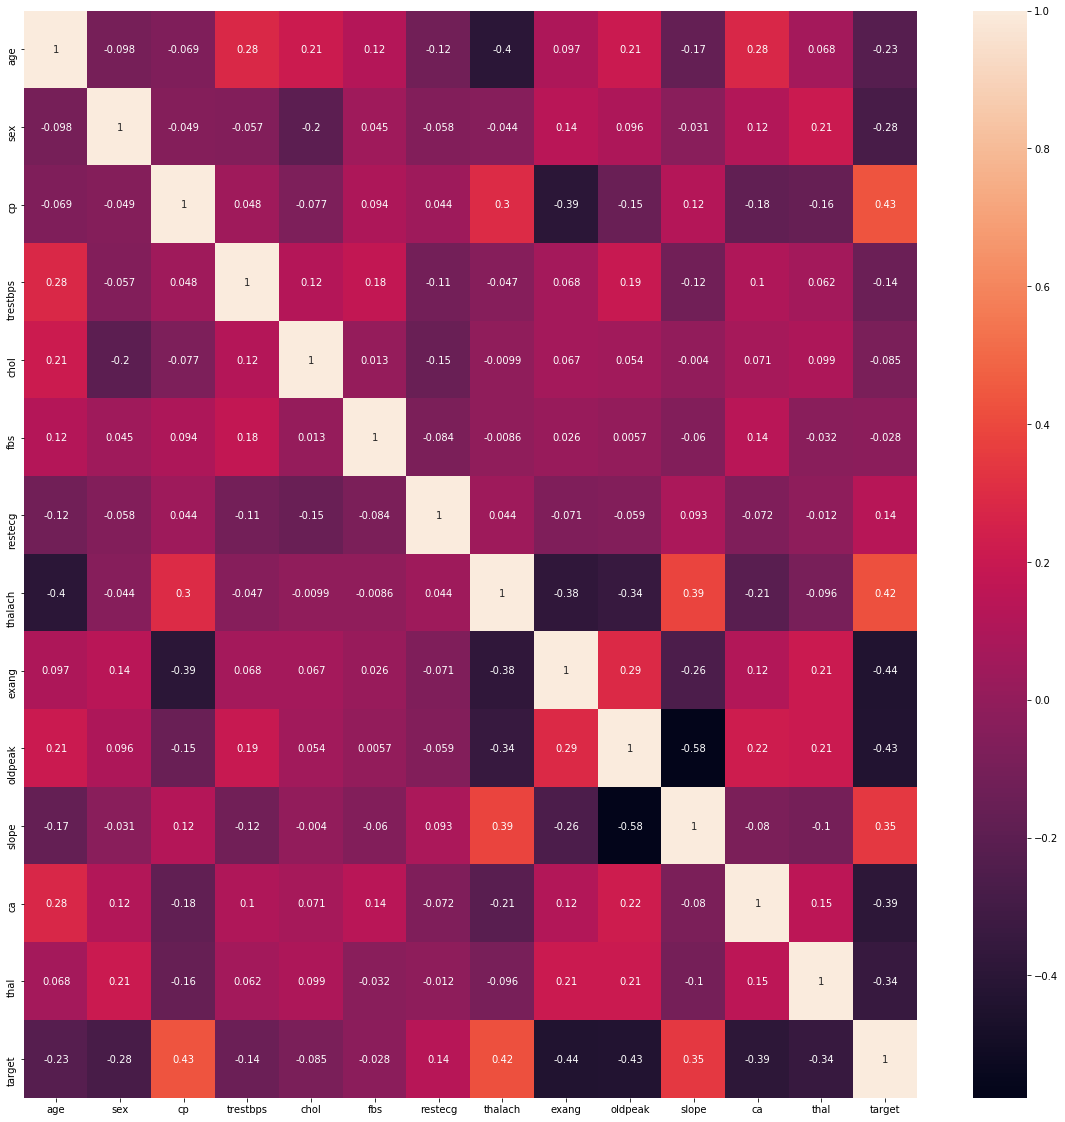

In [4]:
#heatmap으로 feature들의 상관관계 확인하기
fig=plt.figure(figsize=(20,20))
sns.heatmap(heart.corr(),annot=True)


In [5]:
#category형으로 변환해서 데이터 크기를 최소화시킴
heart['sex']=heart['sex'].astype('category')
heart['cp']=heart['cp'].astype('category')
heart['fbs']=heart['fbs'].astype('category')
heart['restecg']=heart['restecg'].astype('category')
heart['exang']=heart['exang'].astype('category')
heart['ca']=heart['ca'].astype('category')
heart['slope']=heart['slope'].astype('category')
heart['thal']=heart['thal'].astype('category')

In [6]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
heart_data=heart.drop("target",axis=1)# feature값만 지정해줌
heart_target=heart["target"]# target값만 지정해줌

In [8]:
#drop_first는 첫번째 column을 삭제함. 다른 행들의 value로 알 수 있기 때문이다.
#get _dummies는 value값들의 값으로서의 연관성을 없애기 위함
heart_data=pd.get_dummies(heart_data,drop_first=True)
heart_data.head(5)

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [9]:
#value들의 분포가 다 다르기에 0부터 1사이의 값으로 변환시켜줌
heart_scaled=MinMaxScaler().fit_transform(heart_data)
heart_scaled=pd.DataFrame(data=heart_scaled,columns=heart_data.columns)
heart_scaled.head(5)

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.885496,0.564516,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.339623,0.178082,0.770992,0.225806,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.245283,0.520548,0.702290,0.096774,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


train,test data로 나누기

In [10]:
#stratify는 지정한 data의 비율을 유지함.
x_train,x_test,y_train,y_test=train_test_split(heart_scaled,heart_target,
                                              test_size=0.2,random_state=121,
                                                stratify=heart_target)

모델링하기

In [11]:
#정확도 return하는 함수 만들기
def crossval(datax,datay,model,cv=3):
    score=cross_val_score(model,datax,datay,cv=cv,scoring='accuracy')
    return(np.mean(score))

In [12]:
#그래프 그리는 함수 만들기
def plotting(ytest,pred):
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    precision,recall,threshold=precision_recall_curve(ytest,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title('Average Precision Score:{}'.format(average_precision_score(ytest,pred[:,1])))
    fpr,tpr,threshold=roc_curve(ytest,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is:{}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')

DecisionTreeClassifier

accuracy score is : 0.7271090534979424


Text(0.5, 1, 'f1 score=0.8169014084507042')

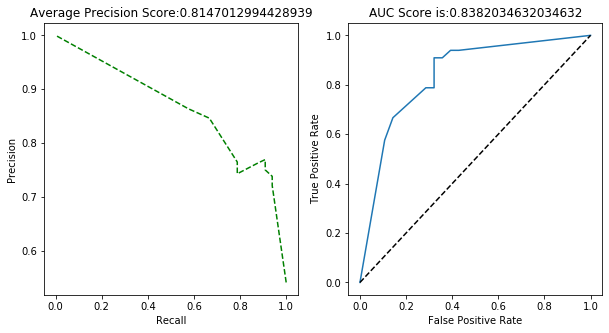

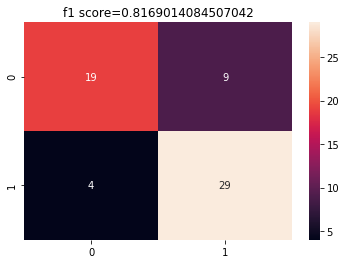

In [13]:
dt_clf=DecisionTreeClassifier(max_depth=6)
score_dt=crossval(x_train,y_train,dt_clf)
print('accuracy score is :',score_dt)
dt_clf.fit(x_train,y_train)
plotting(y_test,dt_clf.predict_proba(x_test))
fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,dt_clf.predict(x_test)),annot=True)
f1_score=f1_score(y_test,dt_clf.predict(x_test))
plt.title('f1 score={}'.format(f1_score))

logisticregression

Accuracy is : 0.8264917695473252


Text(0.5, 1, 'f1 score is=0.84375')

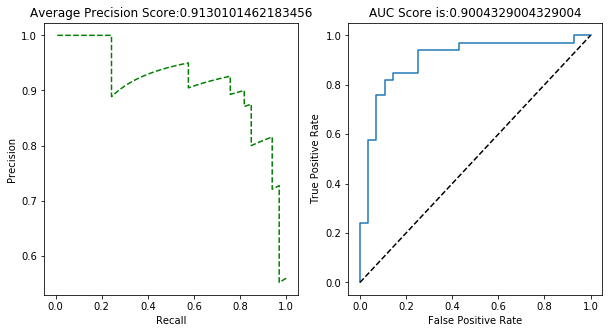

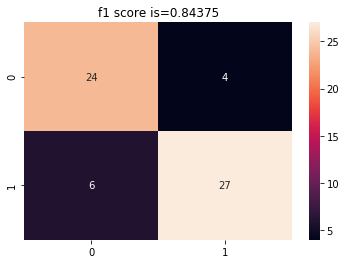

In [19]:
lr_clf=LogisticRegression()
score_lr=crossval(x_train,y_train,lr_clf)
print('Accuracy is :',score_lr)
lr_clf.fit(x_train,y_train)
plotting(y_test,lr_clf.predict_proba(x_test))
fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,lr_clf.predict(x_test)),annot=True)
f1_score=metrics.f1_score(y_test,lr_clf.predict(x_test))
plt.title('f1 score is={}'.format(f1_score))

randomforest

Accuracy is : 0.8058641975308642


Text(0.5, 1, 'f1 score=0.8387096774193549')

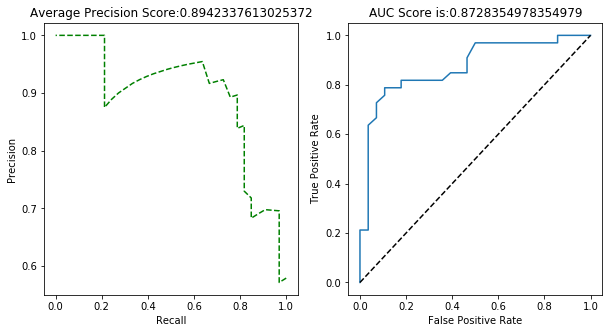

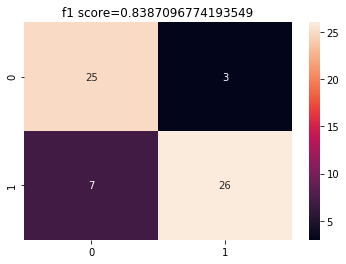

In [20]:
rf_clf=RandomForestClassifier(random_state=121)
score_rf=crossval(x_train,y_train,rf_clf)
print('Accuracy is :',score_rf)
rf_clf.fit(x_train,y_train)
plotting(y_test,rf_clf.predict_proba(x_test))
fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,rf_clf.predict(x_test)),annot=True)
f1_score=metrics.f1_score(y_test,rf_clf.predict(x_test))
plt.title('f1 score={}'.format(f1_score))

중요한 feature들 시각화하기

Text(0.5, 1.0, 'Feature Importances')

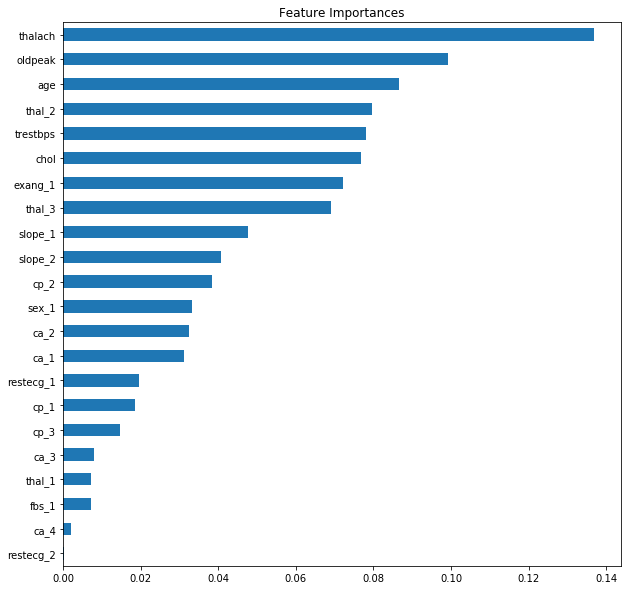

In [16]:
fig=plt.figure(figsize=(10,10))
important=pd.Series(rf_clf.feature_importances_,index=x_train.columns)
important.sort_values().plot.barh()
plt.title('Feature Importances')

모델 정확도 비교

Text(0.5, 1.0, 'Model Accuracy')

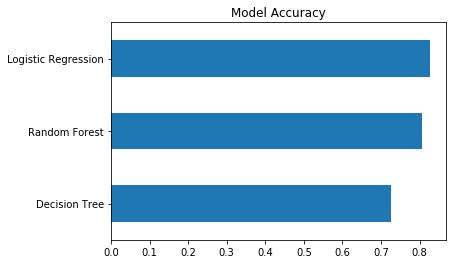

In [17]:
model_accuracy=pd.Series(data=[score_dt,score_lr,score_rf],
                        index=['Decision Tree','Logistic Regression','Random Forest'])
fig=plt.figure()
model_accuracy.sort_values().plot.barh()
plt.title('Model Accuracy')

logistic regression,random forest, decision tree 순서로 정확도가 높음


전에 정밀도가 계속 1이 나와서 안됐었는데 찾아본 결과 get_dummies나 scaler로 value값들을 전처리하는 것이 부족해서 그랬던 것 같다.
f1_score값이 안나오는 것도 찾아봐야 한다.

